# Crop Yield Prediction

The aim of this notebook is to predict the crop yield using the data from the given dataset. The dataset has been taken from the [Crop Yield Prediction](https://www.kaggle.com/datasets/yaminh/crop-yield-prediction).

<img src = "https://img.in-part.com/resize?stripmeta=true&noprofile=true&quality=95&url=https%3A%2F%2Fs3-eu-west-1.amazonaws.com%2Fassets.in-part.com%2Ftechnologies%2Fheader-images%2F2aVv2twTYW9qZGGhPrxw_AdobeStock_241906053.jpeg&width=1200&height=820" width = "700" height = "500">

### Data Dictionary
| Column Name | Description |
|-------------|-------------|
| Rain Fall (mm) | Rainfall in millimeters |
| Temperature (C) | Temperature in Celsius |
| Fertilizer (kg) | Fertilizer in kilograms |
| Nitrogen (N)| Nitrogen macro nutrient |
| Phosphorous (P) | Phosphorous macro nutrient |
| Potassium (K) | Potassium macro nutrient |
| Yield (Q/acres) | Crop yield Quintals per acre|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


# Data Preprocessing

In [4]:
#Checking the shape of the dataset
df.shape

(109, 7)

In [5]:
#Checking the data types of the columns
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

Here, the temperature has object data type which has to be converted to float data type.

In [6]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

The column has invalid value ":" .which must be removed

In [7]:
#Dropping ":" from the Temperatue column
df = df[df['Temperatue'] != ':']

In [8]:
#converting the Temperatue column to float
df['Temperatue'] = df['Temperatue'].astype(float)

In [9]:
#Checking for null values
df.isnull().sum()

Rain Fall (mm)    9
Fertilizer        9
Temperatue        9
Nitrogen (N)      9
Phosphorus (P)    9
Potassium (K)     9
Yeild (Q/acre)    9
dtype: int64

Replacing missing values with median of the column

In [10]:
#replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

Descriptive Statistics

In [11]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [12]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

## Model Building

Models used:

1. Decision Tree Regressor
2. Random Forest Regressor

### Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [16]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.9279431916668135


### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


In [20]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9355014219068669


## Model Evaluation

### Evaluation Metrics

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Decision Tree Regressor")
print("Mean Squared Error(MSE): ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error(MEA): ", mean_absolute_error(y_test, d_pred))
print("\n")
print("Random Forest Regressor")
print("Mean Squared Error(MSE): ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error(MEA): ", mean_absolute_error(y_test, r_pred))

Decision Tree Regressor
Mean Squared Error(MSE):  0.8250555099243105
Mean Absolute Error(MEA):  0.6832293523469994


Random Forest Regressor
Mean Squared Error(MSE):  0.7108302219107439
Mean Absolute Error(MEA):  0.6836246853366845


## Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

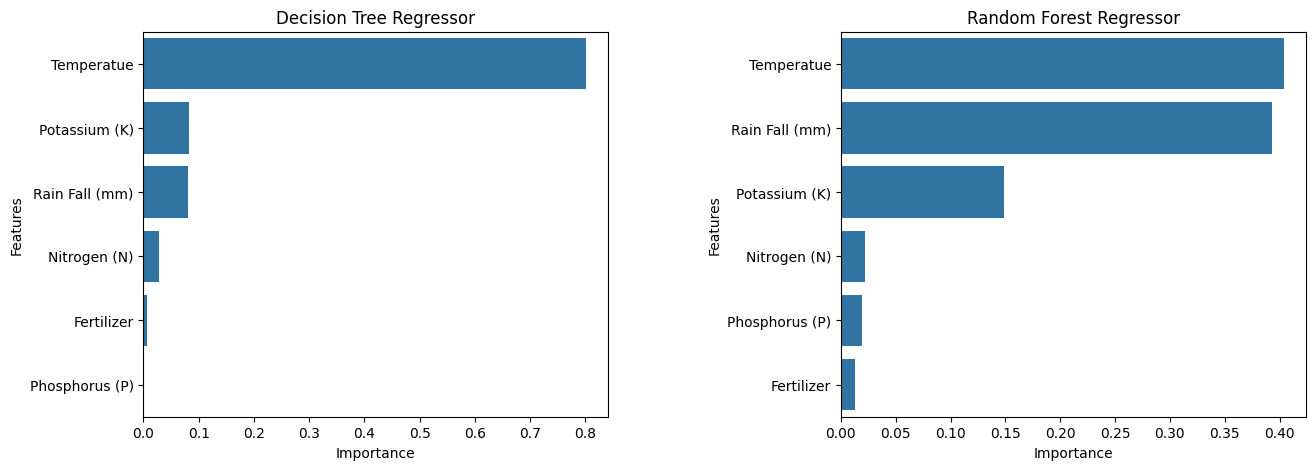

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

## Conclusion

The Random Forest Regressor likely provides more accurate crop yield predictions in this case due to its lower Mean Squared Error (MSE). Additionally, temperature appears to have the highest influence on crop yield.